In [58]:
import pandas as pd;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv('data/Position_Salaries.csv')

In [5]:
df

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

In [10]:
print(df.Position.unique())

['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']


In [9]:
df.Position.value_counts()

Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: count, dtype: int64

In [11]:
print(df.Position.nunique())

10


In [12]:
X = df.iloc[:, 1:2]

In [13]:
X

Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10

In [14]:
X = df.drop(columns=['Position', 'Salary'])

In [15]:
X

Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10

In [16]:
y = df.Salary

In [17]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [30]:
y = np.array(y).reshape(-1,1)

In [31]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X_train

Level
4      5
9     10
1      2
6      7
7      8
3      4
0      1
5      6

In [34]:
X_test

Level
2      3
8      9

In [35]:
y_train

array([[ 110000],
       [1000000],
       [  50000],
       [ 200000],
       [ 300000],
       [  80000],
       [  45000],
       [ 150000]])

In [36]:
y_test

array([[ 60000],
       [500000]])

In [37]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [38]:
X_train

array([[-0.13271219],
       [ 1.63678363],
       [-1.19440968],
       [ 0.57508614],
       [ 0.92898531],
       [-0.48661135],
       [-1.54830884],
       [ 0.22118698]])

In [39]:
X_test

array([[-1.],
       [ 1.]])

In [40]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [41]:
y_train

array([[-0.44345056],
       [ 2.54931528],
       [-0.64521005],
       [-0.14081131],
       [ 0.19545451],
       [-0.5443303 ],
       [-0.66202334],
       [-0.30894423]])

In [42]:
y_test

array([[-1.],
       [ 1.]])

In [49]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [50]:
y_pred = svr_rbf.predict(X_test)

/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [52]:
y_pred

array([129862.12676941, 129693.51967587])

In [53]:
svr_rbf.predict([[11]])

/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([130222.89278386])

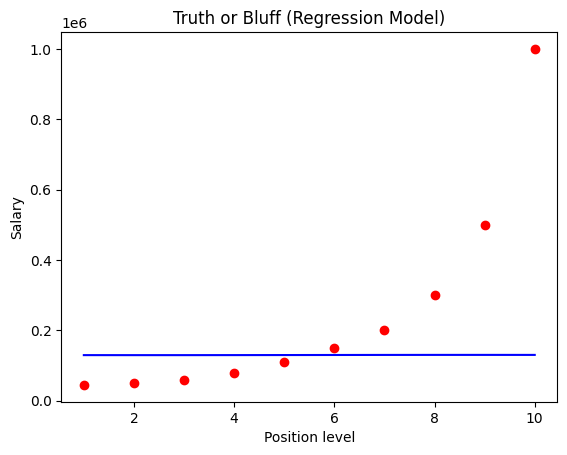

In [55]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, svr_rbf.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [61]:
mean_squared_error(y_test, y_pred)

16842290677.102272

In [62]:
r2_score(y_test, y_pred)

-16842290676.102272

In [63]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(129777.85125784088)